<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 「Pythonによるデータ科学入門」 DAY 12のスライド中のコード

cluster ids: [0, 1, 163, 164, 165, 135, 171, 172, 173, 174, 175, 176, 154]


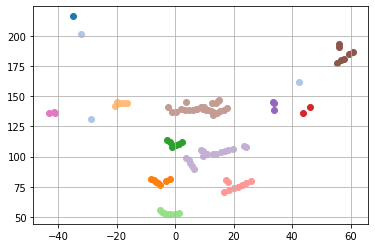

In [ ]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

def rewrite_id(id, link, group, step, n):
    i = int(link[step,0])
    j = int(link[step,1])
    if i<n:
        group[i] = id
    else:
        rewrite_id(id, link, group, i-n, n)

    if j<n:
        group[j] = id
    else:
        rewrite_id(id, link, group, j-n, n)

x = np.loadtxt("geese-3d-pos.txt",delimiter=" ")
N = x.shape[0]

# クラスタリング
linked = linkage(x,'single')
n = x.shape[0]
threshold=7
group=np.empty(n,dtype='int32')
step=0
while True:
    if step>= n-2:
        break
    dist = linked[step,2]   
    if dist>threshold:
        break
    rewrite_id(step+n, linked, group, step, n)
    step=step+1

# 結果のプロット
cmap = plt.get_cmap("tab20")
cids = list(set(group))

print('cluster ids:',cids)

for i in range(x.shape[0]):
    ell = cids.index(group[i]) % 20
    plt.scatter(x[i,0], x[i,1], color=cmap(ell))
plt.grid(True)
plt.show()

ERROR RATE= 0.0


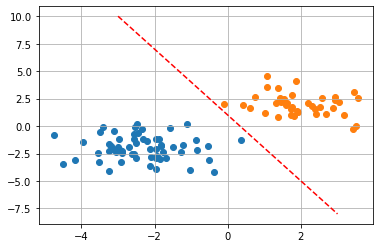

In [ ]:
# coding: utf-8
import numpy as np
import random
import matplotlib.pyplot as plt

def F(a,x):
    s = 0
    m = len(x)
    for j in range(m):
        s += a[j]*x[j]
    if s>0:
        return 1
    else:
        return 0

data = np.loadtxt("sample-2d-2c.txt")
ndata = data.shape[0]

A = np.array([0,1,-1])
X = np.hstack([data[:,0:2], np.array([np.ones(ndata)]).T])
Y = data[:,2]

# training
EPSILON=1.0
cnt=0
while True:
    i = random.randint(0,ndata-1)
    x = X[i,:]
    y = Y[i]
    for k in range(len(A)):
        A[k] += EPSILON * (y - F(A,x))*x[k]
    cnt += 1
    if cnt>100:
        break

# validation
errcnt=0
for i in range(ndata):
    x = X[i,:]
    y = Y[i]
    if F(A,x)!=y:
        errcnt += 1

print('ERROR RATE=',errcnt/ndata)

# plot data
cmap = plt.get_cmap("tab10")
for c in range(2):
    plt.scatter(data[Y==c,0], data[Y==c,1], color=cmap(c))
# draw boundary
x0,x1 = -3,3
y0,y1 = (-A[0]*x0-A[2])/A[1], (-A[0]*x1-A[2])/A[1]
plt.plot([x0,x1],[y0,y1],'--',color='red')
plt.grid(True)
plt.show()

In [ ]:
# coding: utf-8
import numpy as np
import random

def F(a,x):
    s = 0
    m = len(x)
    for j in range(m):
        s += a[j]*x[j]
    if s>0:
        return 1
    else:
        return 0

data = np.loadtxt("sample-4d-2c.txt")
ndata = data.shape[0]

A = np.zeros(5)
X = np.hstack([data[:,0:4], np.array([np.ones(ndata)]).T])
Y = data[:,4]

# training
EPSILON=1.0
cnt=0
while True:
    i = random.randint(0,ndata-1)
    x = X[i,:]
    y = Y[i]
    for k in range(len(A)):
        A[k] += EPSILON * (y - F(A,x))*x[k]
    cnt += 1
    if cnt>3000:
        break

# validation
errcnt=0
for i in range(ndata):
    x = X[i,:]
    y = Y[i]
    if F(A,x)!=y:
        errcnt += 1
print('ERROR RATE=',errcnt/ndata)  

ERROR RATE= 0.0


In [ ]:
# coding: utf-8
from sklearn.linear_model import Perceptron
import numpy as np

data = np.loadtxt("sample-4d-2c.txt")
ndata = data.shape[0]

X = np.hstack([data[:,0:4], \
               np.array([np.ones(ndata)]).T])
Y = data[:,4]

pcpt = Perceptron(eta0=1.0)

# training
pcpt.fit(X,Y)

# validation
y = pcpt.predict(X)
errcnt=0
for i in range(ndata):
    if Y[i]!=y[i]:
        errcnt += 1

print('ERROR RATE=',errcnt/ndata)


ERROR RATE= 0.0


Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.1258 - val_loss: 0.1328
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1308
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1223 - val_loss: 0.1289
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1214 - val_loss: 0.1275
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1207 - val_loss: 0.1261
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1197 - val_loss: 0.1259
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1190 - val_loss: 0.1240
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1179 - val_loss: 0.1236
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1167 - val_loss: 0.1220
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1155 - val_lo

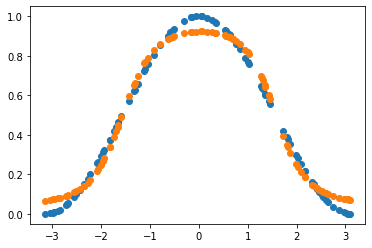

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

x_train=np.random.uniform(-np.pi,np.pi,1000)
y_train=(np.cos(x_train) + 1)/2

x_test=np.random.uniform(-np.pi,np.pi,100)
y_test=(np.cos(x_test) + 1)/2

model = Sequential()
model.add(Dense(10, input_dim=1, activation='sigmoid', use_bias=True))
model.add(Dense(1, use_bias=True, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='Adam')

model.fit(x_train,y_train,epochs=100, batch_size=10, verbose=1,validation_data=(x_test, y_test))

result = model.predict(x_test)

y_predict = result[:,0]

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_predict)
plt.show()